# Data Collection

Dataset ini diambil dari [Kaggle Movielens Dataset](https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset)

In [1]:
import opendatasets

opendatasets.download('https://www.kaggle.com/datasets/ayushimishra2809/movielens-dataset')

Skipping, found downloaded files in ".\movielens-dataset" (use force=True to force download)


# Data Understanding

Terdapat dua file, yakni movies dan rating movies.

Digunakan `len` untuk mengetahui berapa banyak data yang dimiliki

In [2]:
import pandas as pd

movies = pd.read_csv('movielens-dataset/movies.csv')
rating = pd.read_csv('movielens-dataset/ratings.csv')


print('Length of Movies dataset: ', len(movies))
print('Length of Ratings dataset: ', len(rating))


Length of Movies dataset:  10329
Length of Ratings dataset:  105339


# Explanatory Data Analysis

## Univariate Data Analysis

### Movies Variable

Di bawah ini merupakan informasi mengenai dataset `movies`, yang mana terdapat informasi mengenai `movieId`, `title` dari movie, dan `genres` dari movie.

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


`info()` digunakan untuk mengetahui informasi terkait tipe data dan non-null data pada dataset `movies`.

In [5]:
# movies information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


`isna()` dilakukan untuk mengetahui apakah ada missing value pada dataset `movies`

In [12]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

Dataset `movies` memiliki banyak data 10,329 sample dengan 3 fitur

In [7]:
movies.shape

(10329, 3)

In [6]:
print('Banyak data: ', len(movies.movieId.unique()))
print('Judul movies yang ada: ', movies.title.unique())

Banyak data:  10329
Judul movies yang ada:  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'A Very Murray Christmas (2015)' 'The Big Short (2015)'
 'Marco Polo: One Hundred Eyes (2015)']


### Ratings Variable

Di bawah ini merupakan informasi mengenai dataset `movies`, yang mana terdapat informasi mengenai `userId`, `movieId`, `rating` dari movie, dan `timestamp` dari movie.

In [9]:
rating

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


`info()` digunakan untuk mengetahui informasi terkait tipe data dan non-null data pada dataset `rating`.

In [3]:
# rating information
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


`describe()` digunakan untuk mengetahui informasi terkait mean, std, min, quartil, dan max.

Dari tabel yang didapatkan, dapat diketahui bahwa dataset `rating`, memiliki minimum rating 0.5 dan maksimum rating 5 yang dapat diberikan oleh penonton. 

In [6]:
# describe dataset
rating.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [10]:
print('Jumlah judul movie: ', len(movies.movieId.unique()))
print('Jumlah genre movie: ', len(movies.genres.unique()))
print('Jumlah sample rating movie: ', len(rating.userId.unique()))

Jumlah judul movie:  10329
Jumlah genre movie:  938
Jumlah sample rating movie:  668


`isna()` dilakukan untuk mengetahui apakah ada missing value pada dataset `rating`

In [11]:
rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# Data Preprocessing

## Menggabungkan Movie

Penggabungan dataset `movies` dan `rating` dilakukan untuk mendapatkan rekomendasi movie. Fungsi `concatenate` akan menggabungkan kedua dataset tersebut berdasarkan fitur `movieId` yang unik.

In [14]:
import numpy as np

movies_full = np.concatenate((movies.movieId.unique(),
                              rating.movieId.unique()))

movies_full = np.sort(np.unique(movies_full))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movies_full))

Jumlah seluruh data movie berdasarkan movieId:  10329


## Jumlah User

Mendapatkan jumlah user berdasarkan `userId` yang unik dan kemudian mengurutkannya.

In [15]:
user = rating.userId.unique()
user = np.sort(np.unique(user))

print('Jumlah seluruh user: ', len(user))

Jumlah seluruh user:  668


## Mengetahui Rating

Menggabungkan kedua dataset `rating` dan `movies` ke dalam variable `movie` berdasarkan `movieId`.

In [16]:
movie_info = pd.concat([rating, movies])

movie = pd.merge(rating, movie_info, on = 'movieId', how = 'left')
movie

,userId_x,movieId,rating_x,timestamp_x,userId_y,rating_y,timestamp_y,title,genres
0,1,16,4.0,1217897793,1.0,4.0,1.217898e+09,NaN,NaN
1,1,16,4.0,1217897793,9.0,4.0,8.426867e+08,NaN,NaN
2,1,16,4.0,1217897793,12.0,1.5,1.144396e+09,NaN,NaN
3,1,16,4.0,1217897793,24.0,4.0,9.634688e+08,NaN,NaN
4,1,16,4.0,1217897793,29.0,3.0,8.368202e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6562101,668,144976,2.5,1448656898,NaN,NaN,NaN,Bone Tomahawk (2015),Horror|Western
6562102,668,148626,4.5,1451148148,458.0,4.0,1.452015e+09,NaN,NaN
6562103,668,148626,4.5,1451148148,576.0,4.5,1.451688e+09,NaN,NaN
6562104,668,148626,4.5,1451148148,668.0,4.5,1.451148e+09,NaN,NaN


Dapat diketahui bahwa variable `movie` memiliki banyak missing value. `isnull` digunakan untuk mengetahui seberapa banyak missing value yang ada

In [17]:
movie.isnull().sum()

userId_x             0
movieId              0
rating_x             0
timestamp_x          0
userId_y        105339
rating_y        105339
timestamp_y     105339
title          6456767
genres         6456767
dtype: int64

Menggabungkan `movie` berdasarkan fitur `movieId`

In [18]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,userId_y,rating_y,timestamp_y
movieId,,,,,,
1,18144642,211214.5,58348594457940,18066768.0,210308.0,5.809817e+13
2,2893416,28690.5,9196943406591,2862304.0,28382.0,9.098052e+12
3,1026541,10915.0,3233596255210,1009142.0,10730.0,3.178790e+12
4,45240,372.0,127234077648,41470.0,341.0,1.166312e+11
5,1112517,12694.5,3849404128038,1094858.0,12493.0,3.788302e+12
...,...,...,...,...,...,...
146684,1244,8.0,2894913108,622.0,4.0,1.447457e+09
146878,1244,5.0,2895029274,622.0,2.5,1.447515e+09
148238,950,6.0,2902426086,475.0,3.0,1.451213e+09


## Menggabungkan data dengan fitur Movie

Menggabungkan dataset `rating` dan `movies` menjadi `all_movie` berdasarkan `movieId`

In [22]:
all_movie = pd.merge(rating, movies, on = 'movieId', how = 'left')
all_movie

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


# Handling Missing Value

Mengetahui apakah ada dataset yang kosong (missing value). Dapat diketahui bahwa tidak ada dataset yang kosong

In [25]:
all_movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

Melakukan pengurutan berdasarkan `movieId`

In [26]:
all_movie = all_movie.sort_values('movieId', ascending=True)
all_movie

,userId,movieId,rating,timestamp,title,genres
19960,158,1,4.5,1241296244,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76418,536,1,3.0,860417689,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76243,534,1,4.0,916850069,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
76000,532,1,3.0,1440345516,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
75826,531,1,5.0,1447661542,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
70603,475,148238,3.0,1451213043,A Very Murray Christmas (2015),Comedy
66814,458,148626,4.0,1452014749,The Big Short (2015),Drama
86152,576,148626,4.5,1451687664,The Big Short (2015),Drama
105338,668,148626,4.5,1451148148,The Big Short (2015),Drama


Mengecek berapa jumlah movies berdasarkan `movieId`

In [27]:
len(all_movie.movieId.unique())

10325

Mengecek jumlah data terduplikasi data terhadap `movieId` 

In [23]:
all_movie['movieId'].duplicated().sum()

95014

Membuang data terduplikasi berdasarkan `movieId`

In [24]:
all_movie = all_movie.drop_duplicates('movieId')
len(all_movie['movieId'])

10325

Membuat dictionary terhadap dataset yang telah disiapkan sebelumnya

In [25]:
movie_fix = pd.DataFrame({'id': all_movie['movieId'],
                          'title': all_movie['title'],
                          'genre': all_movie['genres']})

movie_fix.head(3)

,id,title,genre
0,16,Casino (1995),Crime|Drama
1,24,Powder (1995),Drama|Sci-Fi
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


# Modeling

## Content Based Filtering

Content Based Filtering dilakukan dengan membuat algoritma untuk mengetahui rekomendasi berdasarkan _history_ user.

Digunakan `Tfidfvectorizer` untuk melakukan perhitungan _idf_ pada `genre` dan melakukan mapping array.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(movie_fix['genre'])
tfidf.get_feature_names()

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'fi',
 'film',
 'genres',
 'horror',
 'imax',
 'listed',
 'musical',
 'mystery',
 'no',
 'noir',
 'romance',
 'sci',
 'thriller',
 'war',
 'western']

Melakukan `fit_transform` untuk mendapatkan bentuk matrix

In [27]:
tfidf_mtx = tfidf.fit_transform(movie_fix['genre'])
tfidf_mtx.shape

(10325, 24)

Hasil dari matrix yang sebelumnya dibuat dapat dilihat dengan `todense()`

In [28]:
tfidf_mtx.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.38168544, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Melihat tf-idf untuk movie berdasarkan genre yang telah spesifik

In [29]:
tfidf_df = pd.DataFrame(tfidf_mtx.todense(),
                        columns=tfidf.get_feature_names(),
                        index=movie_fix.title).sample(24, axis = 1).sample(10, axis = 0)

tfidf_df

,horror,action,film,adventure,animation,comedy,listed,imax,romance,mystery,...,thriller,crime,fantasy,genres,war,no,drama,noir,western,documentary
title,,,,,,,,,,,,,,,,,,,,,
Red Cliff (Chi bi) (2008),0.000000,0.458255,0.0,0.524148,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.662172,0.0,0.277128,0.0,0.0,0.0
"Face in the Crowd, A (1957)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
Once a Thief (1965),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.598809,0.69682,0.0,0.0,0.000000,0.0,0.394804,0.0,0.0,0.0
Exorcist: The Beginning (2004),0.793994,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.607926,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
Night of the Living Dead (1968),0.514763,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.394131,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
"Temptress, The (1926)",0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.853287,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.521442,0.0,0.0,0.0
Amen. (2002),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
Pride & Prejudice (2005),0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.853287,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.521442,0.0,0.0,0.0
Bloodsport 2 (a.k.a. Bloodsport II: The Next Kumite) (1996),0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


### Consine Similarity

Dilakukan cosine similarity untuk mengetahui similarity degree di antara movie

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_mtx)
cosine_sim

array([[1.        , 0.15922835, 0.        , ..., 0.        , 0.        ,
        0.49295494],
       [0.15922835, 1.        , 0.6978008 , ..., 0.        , 0.        ,
        0.32300791],
       [0.        , 0.6978008 , 1.        , ..., 0.        , 0.38168544,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38168544, ..., 0.        , 1.        ,
        0.        ],
       [0.49295494, 0.32300791, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Membuat variable `cosine_dim_df` yang merupakan dataframe untuk melihat kesamaan matrix yang dimiliki dari setiap movie. Dapat dilihat sebagai contoh bahwa movie Red Planet memiliki kesamaan sebesar 0.31 dengan movie Some Guy Who Kills People.

In [39]:
consine_dim_df = pd.DataFrame(cosine_sim, index = movie_fix['title'], columns=movie_fix['title'])
print('Shape: ', consine_dim_df.shape)

consine_dim_df.sample(5, axis =1).sample(10, axis = 0)

Shape:  (10325, 10325)


title,Insidious: Chapter 2 (2013),Dust Devil (1992),"Inbetweeners 2, The (2014)",And God Created Woman (1988),Dolls (2002)
title,,,,,
50/50 (2011),0.000000,0.000000,0.777201,0.696683,0.328119
Out of Time (2003),0.364032,0.272233,0.000000,0.173078,0.205867
Rocketship X-M (1950),0.000000,0.000000,0.000000,0.000000,0.000000
"Last King of Scotland, The (2006)",0.507541,0.379554,0.000000,0.241309,0.287025
Speechless (1994),0.000000,0.000000,0.602438,0.898785,0.681064
Big Momma's House 2 (2006),0.000000,0.000000,0.454806,0.246260,0.000000
Goon (2011),0.000000,0.000000,0.777201,0.696683,0.328119
"Stepfather, The (2009)",1.000000,0.747829,0.000000,0.000000,0.000000
Frostbitten (Frostbiten) (2006),0.673760,0.503857,0.529082,0.286478,0.000000


Membuat fungsi `movie_recommendation` dengan parameter `movie_name` untuk mendapatkan rekomendasi berdasarkan movie yang ada.

In [40]:
def movie_recommendation(movie_name):
    k = 5
    items = movie_fix[['title', 'genre']]
    index = consine_dim_df.loc[:, movie_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = consine_dim_df.columns[index[-1: -(k+2): -1]]
    closest = closest.drop(movie_name, errors = 'ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Kemudian, akan dilakukan pencarian untuk mengetahui rekomendasi movie yang mirip dengan `Toy Story (1995)`

In [41]:
movie_fix[movie_fix.title.eq('Toy Story (1995)')]

,id,title,genre
113,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Dengan menggunakan fungsi `movie_recommendation` diketahui bahwa terdapat lima movie yang mirip dan direkomendasikan berdasarkan rating pengguna terhadap movie `Toy Story (1995)`

In [43]:
movie_recommendation('Toy Story (1995)')

,title,genre
0,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy
1,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
2,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy
3,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy
4,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy


## Collaborative Filtering

In [52]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [46]:
rating.sample(5)

,userId,movieId,rating,timestamp
84093,575,4681,2.0,995577182
5585,62,196,2.0,1268793348
27794,200,296,4.5,1271878585
25733,189,8656,5.0,1195626629
5158,59,27706,4.5,1439611041


### Data Preparation

melakukan tahapan preprocessing dengan melakukan beberapa encoding terhadap `userId`

In [47]:
# UserID menjadi unique list
user_id = rating['userId'].unique().tolist()
 
# Encoding userID
user_encoded = {x: i for i, x in enumerate(user_id)}
 
# Encoding angka ke ke userID
to_user = {i: x for i, x in enumerate(user_id)}


melakukan tahapan preprocessing dengan melakukan beberapa encoding terhadap fitur `movieId`

In [48]:
# MovieId menjadi list tanpa nilai yang sama
movie_id = rating['movieId'].unique().tolist()
 
# Proses encoding movieId
movie_encoded = {x: i for i, x in enumerate(movie_id)}
 
# Proses encoding angka ke movieId
to_movie = {i: x for i, x in enumerate(movie_id)}
  
# Mapping userId ke dataframe genres
rating['genres'] = rating['userId'].map(user_encoded)
 
# Mapping movieD ke dataframe movies
rating['movies'] = rating['movieId'].map(movie_encoded)

Dilakukan beberapa preprocessing tambahan seperti mengubah tipe menjadi float, mengecek nilai maksimum dan minimum.

In [49]:
num_users = len(user_encoded)
 
num_movie = len(to_movie)
 
rating['ratings'] = rating['rating'].values.astype(np.float32)
 
min_rating = min(rating['rating'])
 
max_rating = max(rating['rating'])
 
print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 668, Number of movie: 10325, Min Rating: 0.5, Max Rating: 5.0


### Splitting Data Training dan Validasi

In [50]:
# Mengacak dataset
df = rating.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
41032,285,2605,3.0,974036328,284,1575,3.0
1938,24,897,4.0,963472695,23,1118,4.0
92480,607,4016,4.0,979339130,606,318,4.0
30160,219,3981,2.0,1011718777,218,2522,2.0
28079,203,546,2.0,955137146,202,407,2.0
...,...,...,...,...,...,...,...
54886,402,780,2.5,1172355892,401,34,2.5
76820,541,2334,4.0,1004508382,540,2489,4.0
103694,668,55288,2.5,1242489706,667,2733,2.5
860,11,377,3.0,850815719,10,19,3.0


Membagi data dengan rasio 80:20 untuk data training dan validation

In [51]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values
 
# Membuat variabel y untuk membuat ratings dari hasil 
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 284 1575]
 [  23 1118]
 [ 606  318]
 ...
 [ 667 2733]
 [  10   19]
 [ 127 1983]] [0.55555556 0.77777778 0.77777778 ... 0.44444444 0.55555556 0.55555556]


Melakukan proses training

In [53]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

### Evaluation

Melakukan proses compile terhadap model dengan menggunakan matriks evaluasi RMSE

In [55]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

Melakukan proses training dengan `fit` dengan batch size sebesar 64 dan 100 epochs.

In [56]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1317/1317 [==============================] - 28s 15ms/step - loss: 0.6350 - root_mean_squared_error: 0.2343 - val_loss: 0.6157 - val_root_mean_squared_error: 0.2124
Epoch 2/100
1317/1317 [==============================] - 18s 14ms/step - loss: 0.6103 - root_mean_squared_error: 0.2085 - val_loss: 0.6122 - val_root_mean_squared_error: 0.2083
Epoch 3/100
1317/1317 [==============================] - 18s 14ms/step - loss: 0.6051 - root_mean_squared_error: 0.2030 - val_loss: 0.6101 - val_root_mean_squared_error: 0.2062
Epoch 4/100
1317/1317 [==============================] - 18s 13ms/step - loss: 0.6035 - root_mean_squared_error: 0.2011 - val_loss: 0.6093 - val_root_mean_squared_error: 0.2053
Epoch 5/100
1317/1317 [==============================] - 18s 14ms/step - loss: 0.6032 - root_mean_squared_error: 0.2007 - val_loss: 0.6071 - val_root_mean_squared_error: 0.2029
Epoch 6/100
1317/1317 [==============================] - 18s 13ms/step - loss: 0.6035 - root_mean_squared_error: 0.

Memvisualisasikan hasil dari proses training yang berlangsung. Dari visualisasi proses training model di atas cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.19 dan error pada data validasi sebesar 0.20.

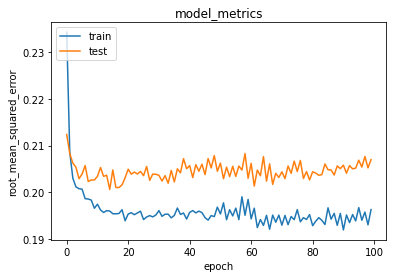

In [57]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Rekomendasi Movie

In [58]:
movie_df = movie_fix
df = pd.read_csv('movielens-dataset/ratings.csv')
 

user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]
 

movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id'] 
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_encoded.keys()))
)
 
movie_not_watched = [[movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Digunakan `.predict()` untuk mendapatkan rekomendasi movie

In [60]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genre)

320/320 [==============================] - 1s 2ms/step
Showing recommendations for users: 342
movie with high ratings from user
--------------------------------
Multiplicity (1996) : Comedy
Maverick (1994) : Adventure|Comedy|Western
Age of Innocence, The (1993) : Drama
Legends of the Fall (1994) : Drama|Romance|War|Western
Primal Fear (1996) : Crime|Drama|Mystery|Thriller
--------------------------------
Top 10 movie recommendation
--------------------------------
Memories (Memorîzu) (1995) : Animation|Fantasy|Sci-Fi|Thriller
King of Masks, The (Bian Lian) (1996) : Drama
Memories of Murder (Salinui chueok) (2003) : Crime|Drama|Mystery|Thriller
Until the End of the World (Bis ans Ende der Welt) (1991) : Adventure|Drama|Sci-Fi
Interstate 60 (2002) : Adventure|Comedy|Drama|Fantasy|Mystery|Sci-Fi|Thriller
Resident Evil: Retribution (2012) : Action|Horror|Sci-Fi|IMAX
Fireworks (Hana-bi) (1997) : Crime|Drama
Pier, The (Jetée, La) (1962) : Romance|Sci-Fi
Star Wreck: In the Pirkinning (2005) :

Dari hasil rekomendasi di atas, diketahui bahwa rekomendasi paling tinggi adalah movie dengan genre comedy. Kemudian, top 10 movie yang direkomendasikan oleh sistem adalah Animasi, Fantasi, Sci-fi, dan Thriller.